<a href="https://colab.research.google.com/github/quantumhome/DataAnalysisCaseStudy/blob/master/Attrition_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement 2. can you predict the employee attrition in an organization based on the following features. The features and the dataset are given below. use a classification model with KNN algorithm**

**Features:**


*   Age: Age of the employee (numerical).
*   JobRole: The job role/position of the employee (categorical).
*   MonthlyIncome: Employee's monthly salary (numerical).
*   JobSatisfaction: A rating from 1 to 4 indicating the employee's satisfaction with the job (numerical).
*   YearsAtCompany: Number of years the employee has been at the company (numerical).
*  Attrition: Target label indicating whether the employee left the company (1 for attrition, 0 for no attrition)













Age,JobRole,MonthlyIncome,JobSatisfaction,YearsAtCompany,Attrition
29,Sales Executive,4800,3,4,1
35,Research Scientist,6000,4,8,0
40,Laboratory Technician,3400,2,6,0
28,Sales Executive,4300,3,3,1
45,Manager,11000,4,15,0
25,Research Scientist,3500,1,2,1
50,Manager,12000,4,20,0
30,Sales Executive,5000,2,5,0
37, Laboratory Technician,3100,2,9,0
26, Research Scientist,4500,3,2,1**

In [14]:
# import library
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt




In [15]:
# Step 1: dataset
data = {
    'Age': [29, 35, 40, 28, 45, 25, 50, 30, 37, 26],
    'JobRole': ['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Sales Executive',
                'Manager', 'Research Scientist', 'Manager', 'Sales Executive', 'Laboratory Technician', 'Research Scientist'],
    'MonthlyIncome': [4800, 6000, 3400, 4300, 11000, 3500, 12000, 5000, 3100, 4500],
    'JobSatisfaction': [3, 4, 2, 3, 4, 1, 4, 2, 2, 3],
    'YearsAtCompany': [4, 8, 6, 3, 15, 2, 20, 5, 9, 2],
    'Attrition': [1, 0, 0, 1, 0, 1, 0, 0, 0, 1]
}

df = pd.DataFrame(data)
df



,Age,JobRole,MonthlyIncome,JobSatisfaction,YearsAtCompany,Attrition
0,29,Sales Executive,4800,3,4,1
1,35,Research Scientist,6000,4,8,0
2,40,Laboratory Technician,3400,2,6,0
3,28,Sales Executive,4300,3,3,1
4,45,Manager,11000,4,15,0
5,25,Research Scientist,3500,1,2,1
6,50,Manager,12000,4,20,0
7,30,Sales Executive,5000,2,5,0
8,37,Laboratory Technician,3100,2,9,0
9,26,Research Scientist,4500,3,2,1


In [16]:
# Encoding
le = LabelEncoder()
df['JobRole'] = le.fit_transform(df['JobRole'])



In [17]:
# Define features and target target variable
X = df[['Age', 'JobRole', 'MonthlyIncome', 'JobSatisfaction', 'YearsAtCompany']]
y = df['Attrition']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [18]:
# Train KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

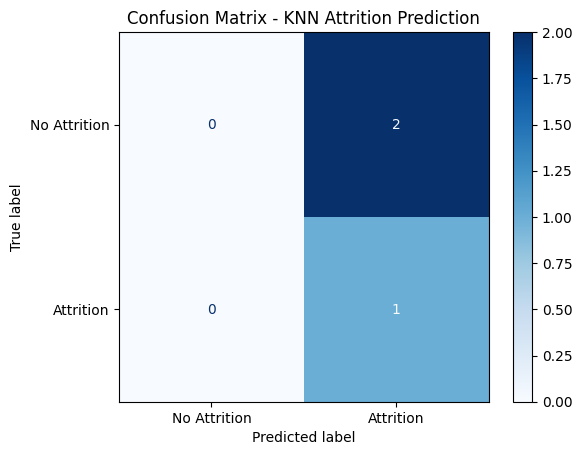

In [19]:
# Evalute
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Attrition", "Attrition"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - KNN Attrition Prediction")
plt.show()